# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt 
import scipy.stats as st

#Set today's date as a variable
date = pd.to_datetime("today").strftime("%m/%d/%Y")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
# Set base url path and units to "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
my_cities = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

#Set Counter
counter = 0

#Print header for tracking run
print("Beginning Data Retrieval")
print("______________________________")

# Loop through the list of cities and perform a request for data on each

for city in cities:
    
    #Print tracking detail
    print ("Processing Record "+str(counter)+" of Set 1 | "+city)
    counter += 1
    
    try:
        response = requests.get(query_url + city).json()
        
        # Add requested city fields
        my_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(round((response['main']['temp_max']*1.8)+32,2))
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
      
    except:
        #Print exception detail
        print("City not found, skipping")

Beginning Data Retrieval
______________________________
Processing Record 0 of Set 1 | sawtell
Processing Record 1 of Set 1 | yenagoa
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | illoqqortoormiut
City not found, skipping
Processing Record 4 of Set 1 | nizhneyansk
City not found, skipping
Processing Record 5 of Set 1 | soavinandriana
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | haftoni
Processing Record 9 of Set 1 | ishinomaki
Processing Record 10 of Set 1 | novokruchininskiy
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | manokwari
Processing Record 19 of Set 1 | taolanaro
City not found, skipping
Processing Record 20 of Set

Processing Record 184 of Set 1 | mitsamiouli
Processing Record 185 of Set 1 | san quintin
Processing Record 186 of Set 1 | vanderhoof
Processing Record 187 of Set 1 | ribeira grande
Processing Record 188 of Set 1 | sant julia de loria
Processing Record 189 of Set 1 | clyde river
Processing Record 190 of Set 1 | babanusah
City not found, skipping
Processing Record 191 of Set 1 | ijaki
City not found, skipping
Processing Record 192 of Set 1 | kataysk
Processing Record 193 of Set 1 | san cristobal
Processing Record 194 of Set 1 | saint george
Processing Record 195 of Set 1 | tautira
Processing Record 196 of Set 1 | derzhavinsk
Processing Record 197 of Set 1 | ilulissat
Processing Record 198 of Set 1 | lesozavodsk
Processing Record 199 of Set 1 | moron
Processing Record 200 of Set 1 | camacha
Processing Record 201 of Set 1 | fernandina beach
Processing Record 202 of Set 1 | port blair
Processing Record 203 of Set 1 | rocha
Processing Record 204 of Set 1 | mashhad
Processing Record 205 of S

Processing Record 370 of Set 1 | san ramon
Processing Record 371 of Set 1 | mathathane
Processing Record 372 of Set 1 | abha
Processing Record 373 of Set 1 | kenai
Processing Record 374 of Set 1 | westport
Processing Record 375 of Set 1 | suleja
Processing Record 376 of Set 1 | kapoeta
Processing Record 377 of Set 1 | deputatskiy
Processing Record 378 of Set 1 | anito
Processing Record 379 of Set 1 | palmer
Processing Record 380 of Set 1 | tsaratanana
Processing Record 381 of Set 1 | hamilton
Processing Record 382 of Set 1 | longyearbyen
Processing Record 383 of Set 1 | ketchikan
Processing Record 384 of Set 1 | lvov
Processing Record 385 of Set 1 | nyagan
Processing Record 386 of Set 1 | mirnyy
Processing Record 387 of Set 1 | rawson
Processing Record 388 of Set 1 | pisco
Processing Record 389 of Set 1 | kano
Processing Record 390 of Set 1 | paamiut
Processing Record 391 of Set 1 | tiarei
Processing Record 392 of Set 1 | bandarbeyla
Processing Record 393 of Set 1 | santa fe
Processing

Processing Record 558 of Set 1 | antofagasta
Processing Record 559 of Set 1 | kidal
Processing Record 560 of Set 1 | la pila
Processing Record 561 of Set 1 | buala
Processing Record 562 of Set 1 | cururupu
Processing Record 563 of Set 1 | manosque
Processing Record 564 of Set 1 | eureka
Processing Record 565 of Set 1 | saint-pierre
Processing Record 566 of Set 1 | gorno-chuyskiy
City not found, skipping
Processing Record 567 of Set 1 | lakes entrance
Processing Record 568 of Set 1 | san andres
Processing Record 569 of Set 1 | port hardy
Processing Record 570 of Set 1 | constitucion
Processing Record 571 of Set 1 | loandjili
Processing Record 572 of Set 1 | makakilo city
Processing Record 573 of Set 1 | sinop
Processing Record 574 of Set 1 | ponta delgada
Processing Record 575 of Set 1 | lere
Processing Record 576 of Set 1 | madona
Processing Record 577 of Set 1 | xiamen
Processing Record 578 of Set 1 | puro
Processing Record 579 of Set 1 | kichera
Processing Record 580 of Set 1 | verkh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
#Display sample JSON output to assist in defining dataframe
requests.get(query_url + "sawtell").json()

{'coord': {'lon': 153.1, 'lat': -30.38},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 17.9,
  'feels_like': 15.14,
  'temp_min': 17.78,
  'temp_max': 18,
  'pressure': 1023,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 230},
 'rain': {'1h': 0.26},
 'clouds': {'all': 75},
 'dt': 1607671846,
 'sys': {'type': 1,
  'id': 9521,
  'country': 'AU',
  'sunrise': 1607625539,
  'sunset': 1607676174},
 'timezone': 39600,
 'id': 2150163,
 'name': 'Sawtell',
 'cod': 200}

In [257]:
# create a data frame from to include City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country and Date

#Set Dictionary
weather_dict = {
    "City": my_cities,
    "Lat": lat,
    "Lng": lng,    
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
    }

#Create weather dataframe
weather_data_df = pd.DataFrame(weather_dict)

# write the dataframe to a csv

weather_data_df.to_csv("../output_data/cities.csv")

#View Dataframe
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawtell,-30.38,153.10,64.40,93,75,7.20,AU,12/11/2020
1,Yenagoa,4.92,6.26,81.73,80,34,2.10,NG,12/11/2020
2,Hithadhoo,-0.60,73.08,82.11,76,14,5.38,MV,12/11/2020
3,Soavinandriana,-19.17,46.73,72.14,73,97,4.05,MG,12/11/2020
4,Bluff,-46.60,168.33,48.00,87,92,7.60,NZ,12/11/2020
...,...,...,...,...,...,...,...,...,...
566,Rio Grande,-32.03,-52.10,69.01,93,0,0.45,BR,12/11/2020
567,Progreso,21.28,-89.67,66.99,77,75,4.10,MX,12/11/2020
568,The Valley,18.22,-63.06,78.01,83,40,1.50,AI,12/11/2020
569,Saint Lawrence,36.06,14.20,60.80,77,75,7.20,MT,12/11/2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
#Checked and confirmed no humidity recorded at over 100%

#Describe the dataframe to get Max stats on humidity
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,5.710000e+02
mean,19.641506,18.252399,52.822487,74.52014,53.739054,3.418827,1.607672e+09
std,33.008609,89.421499,29.942934,19.22811,40.691353,2.472354,6.223286e+01
min,-54.800000,-175.200000,-41.800000,10.00000,0.000000,0.090000,1.607671e+09
25%,-7.960000,-60.945000,33.205000,65.00000,4.000000,1.550000,1.607672e+09
50%,22.290000,23.370000,62.350000,78.00000,68.000000,2.850000,1.607672e+09
75%,47.835000,94.385000,77.020000,88.00000,94.000000,4.600000,1.607672e+09
max,78.220000,178.420000,96.800000,100.00000,100.000000,17.000000,1.607672e+09


In [79]:
#  Get the indices of cities that have humidity over 100%.

#set weather_data with an index
index = weather_data_df.index

#Isolate range we're wanting to exclude
condition = weather_data_df['Humidity'] > 100

#Name our group to exclude
high_hum_indices = index[condition]

#Convert our group to be excluded into a list
high_hum_indices_list = high_hum_indices.tolist()


#Print the list just to view results -     CP Note - Results was an empty set as no records exceeded 100% humidity
print(high_hum_indices_list)

[]


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#CP Note - No records were dropped as Humidity never exceeded 100%. count remains at 571

clean_weather_data_df = weather_data_df.drop(high_hum_indices,inplace=False)
clean_weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawtell,-30.38,153.10,64.40,93,75,7.20,AU,1607671846
1,Yenagoa,4.92,6.26,81.73,80,34,2.10,NG,1607671846
2,Hithadhoo,-0.60,73.08,82.11,76,14,5.38,MV,1607671846
3,Soavinandriana,-19.17,46.73,72.14,73,97,4.05,MG,1607671846
4,Bluff,-46.60,168.33,48.00,87,92,7.60,NZ,1607671847
...,...,...,...,...,...,...,...,...,...
566,Rio Grande,-32.03,-52.10,69.01,93,0,0.45,BR,1607671929
567,Progreso,21.28,-89.67,66.99,77,75,4.10,MX,1607671694
568,The Valley,18.22,-63.06,78.01,83,40,1.50,AI,1607671816
569,Saint Lawrence,36.06,14.20,60.80,77,75,7.20,MT,1607671929


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
#Set today's date as a variable
date = pd.to_datetime("today").strftime("%m/%d/%Y")

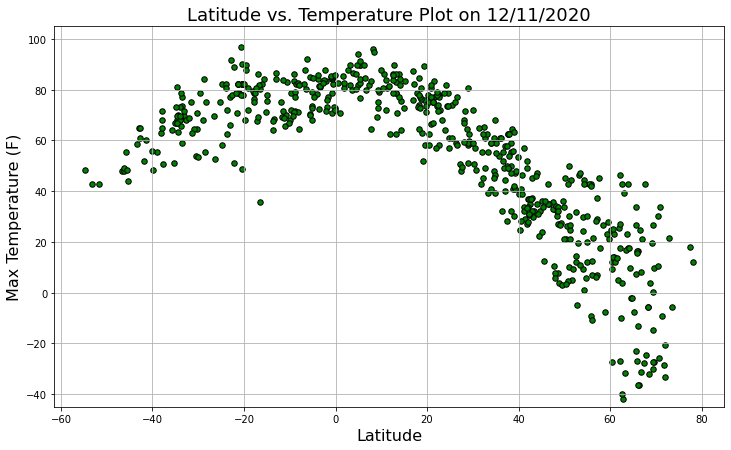

In [236]:
#Charactorize figure size/layout                       
fig, ax = plt.subplots(figsize=(12, 7))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
ax.scatter(clean_weather_data_df['Lat'],clean_weather_data_df['Max Temp'],s=30,edgecolors='black', color="green")

#define title and Lable axis
ax.set_title('Latitude vs. Temperature Plot on '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Max Temperature (F)',fontsize =16)
marker_size = .05

#Add a grid
plt.grid()

#Establish plot limits
plt.ylim(-45, 105)

#Save to .png file
fig.savefig("../output_data/latitude_vs_max_temp.png")

plt.show()

# Plot Observation(s) - Plot shows an expected higher temperature near the equator. The significance of the colder northern
# readings is likly to to the time of year in the north (nearing winter).

## Latitude vs. Humidity Plot

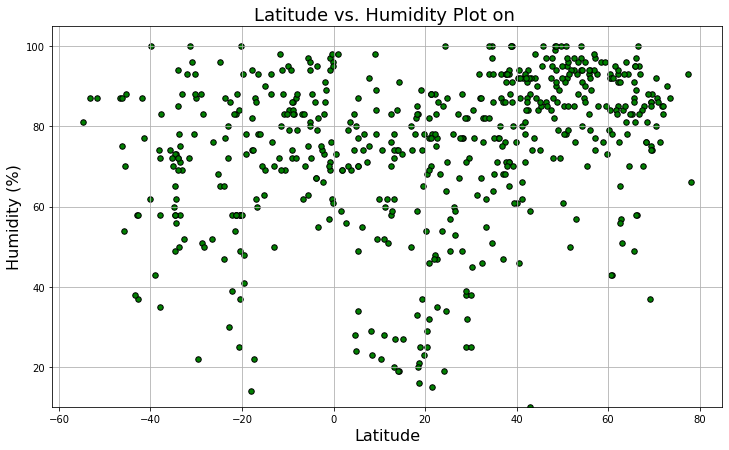

In [93]:
#Charactorize figure size/layout                       
fig, ax = plt.subplots(figsize=(12, 7))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
ax.scatter(clean_weather_data_df['Lat'],clean_weather_data_df['Humidity'],s=30,edgecolors='black', color="green")

#define title and Lable axis
ax.set_title('Latitude vs. Humidity Plot on '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Humidity (%)',fontsize =16)
marker_size = .05

#Add a grid
plt.grid()

#Establish plot limits
plt.ylim(10, 105)

#Save to .png file
fig.savefig("../output_data/latitude_vs_humidity.png")

plt.show()

# Plot Observation(s) - Not an apparant pattern other than to note humidity registered on this day and time tended
#to be 60% or higher

## Latitude vs. Cloudiness Plot

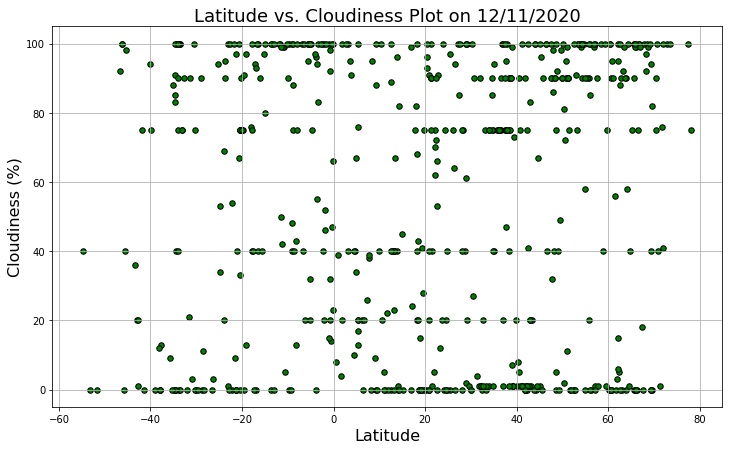

In [94]:
#Charactorize figure size/layout                       
fig, ax = plt.subplots(figsize=(12, 7))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
ax.scatter(clean_weather_data_df['Lat'],clean_weather_data_df['Cloudiness'],s=30,edgecolors='black', color="green")

#define title and Lable axis
ax.set_title('Latitude vs. Cloudiness Plot on '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Cloudiness (%)',fontsize =16)
marker_size = .05

#Add a grid
plt.grid()

#Establish plot limits
plt.ylim(-5, 105)

#Save to .png file
fig.savefig("../output_data/latitude_vs_cloudiness.png")

plt.show()

# Plot Observation(s) - Not an apparant pattern other than to note a substantial number of locations appeared either
#clear or 100% cloudy.

## Latitude vs. Wind Speed Plot

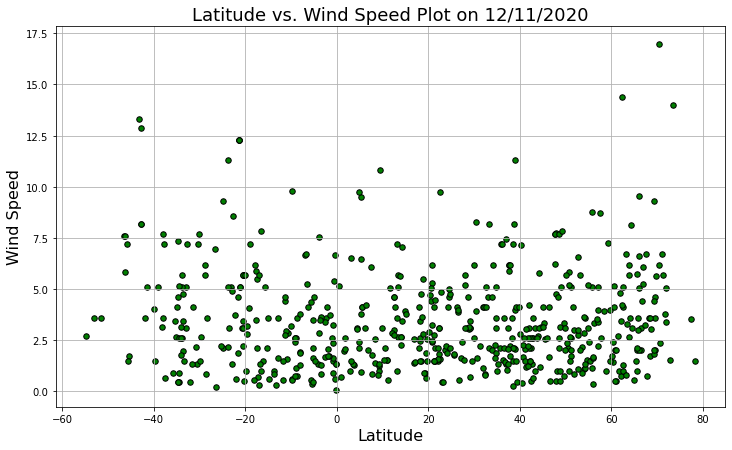

In [235]:
#Charactorize figure size/layout                       
fig, ax = plt.subplots(figsize=(12, 7))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
ax.scatter(clean_weather_data_df['Lat'],clean_weather_data_df['Wind Speed'],s=30,edgecolors='black', color="green")

#define title and Lable axis
ax.set_title('Latitude vs. Wind Speed Plot on '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Wind Speed',fontsize =16)
marker_size = .05

#Add a grid
plt.grid()

#Establish plot limits
#plt.ylim(-5, 16)

#Save to .png file
fig.savefig("../output_data/latitude_vs_wind_speed.png")

plt.show()

# Plot Observation(s) - Not an apparant pattern other than to note a substantial number of locations appeared to
#have winds of 5 or less.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [195]:
#Narrow Latitude to Northern Hemisphere
NH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] >=0)]

In [196]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Max Temp'])[0],5)
Correlation_Coef

-0.88888

In [197]:
#Calulate linear formula
x_values = NH_clean_weather_data_df['Lat']
y_values = NH_clean_weather_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"NH Max Temp vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,NH Max Temp vs Lat,{-1.4175763980827538},{98.33681448408365},{-0.8888840576248028},{-0.88888},{0.03723589778699695}


In [198]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -1.42x + 98.34'

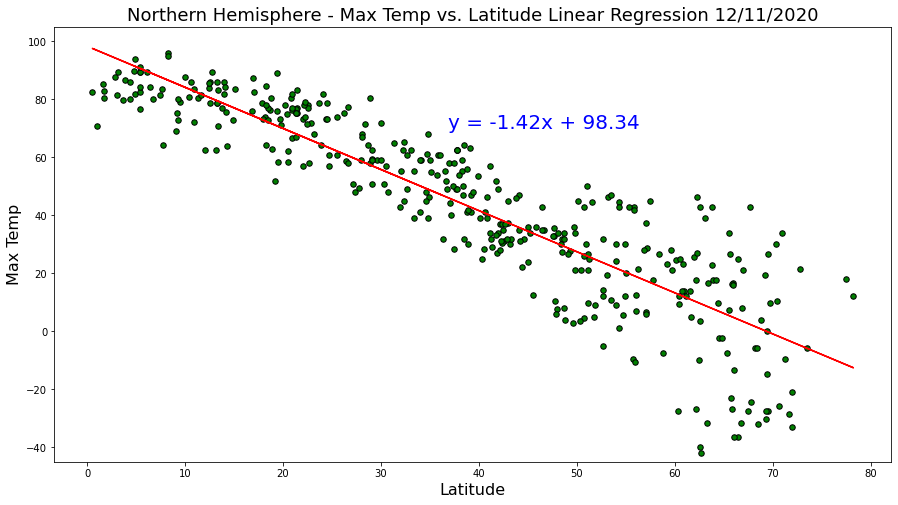

In [199]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Max Temp vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Max Temp'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Max Temp',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(-45, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(35, 28), xycoords='data',xytext=(0.7, 0.8), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/NorthernHem_Max_Temp_vs_Lat_Linear_Regression.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [200]:
#Narrow Latitude to Southern Hemisphere
SH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] <=0)]

In [201]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Max Temp'])[0],5)
Correlation_Coef

0.6172

In [202]:
#Calulate linear formula
x_values = SH_clean_weather_data_df['Lat']
y_values = SH_clean_weather_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"SH Max Temp vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,SH Max Temp vs Lat,{0.5121436322249008},{82.95601771142287},{0.6172023990212405},{0.6172},{0.048394417844963566}


In [203]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.51x + 82.96'

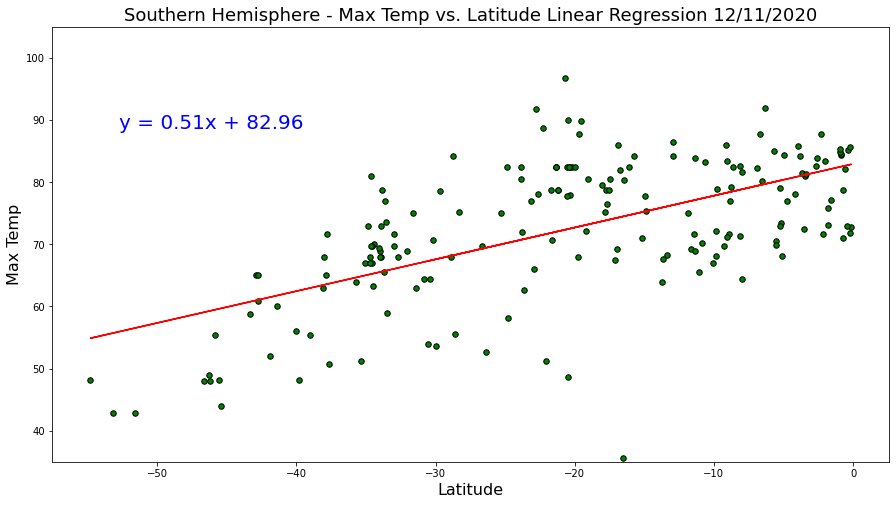

In [204]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Max Temp vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Max Temp'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Max Temp',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(35, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(-55, 38), xycoords='data',xytext=(.3, 0.8), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/SouthernHem_Max_Temp_vs_Lat_Linear_Regression.png")

plt.show()

In [ ]:
# Northern/Southern Hemisphere Regression Observation(s) - Both plot depicted a rising temperature as they approached
# the equator. Northern temperatures were colder due to onset of winter

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [205]:
#Narrow Latitude to Northern Hemisphere
NH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] >=0)]

In [206]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Humidity'])[0],5)
Correlation_Coef

0.42153

In [207]:
#Calulate linear formula
x_values = NH_clean_weather_data_df['Lat']
y_values = NH_clean_weather_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"NH Humidity vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,NH Humidity vs Lat,{0.4291589719495433},{58.68282772937168},{0.42152964658271924},{0.42153},{0.04705201437489204}


In [208]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.43x + 58.68'

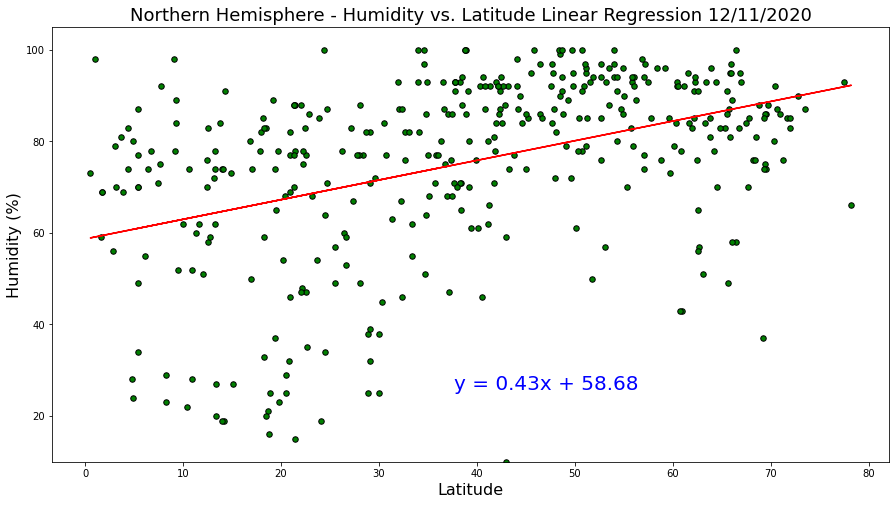

In [209]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Humidity vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Humidity'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Humidity (%)',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(10, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(35, 10), xycoords='data',xytext=(0.7, 0.2), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/NorthernHem_Humidity_vs_Lat_Linear_Regression.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [210]:
#Narrow Latitude to Southern Hemisphere
SH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] <=0)]

In [211]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Humidity'])[0],5)
Correlation_Coef

0.21017

In [212]:
#Calulate linear formula
x_values = SH_clean_weather_data_df['Lat']
y_values = SH_clean_weather_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"SH Humidity vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,SH Humidity vs Lat,{0.26375149241936935},{78.28965442847743},{0.21016780666728516},{0.21017},{0.09094592685230372}


In [213]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.26x + 78.29'

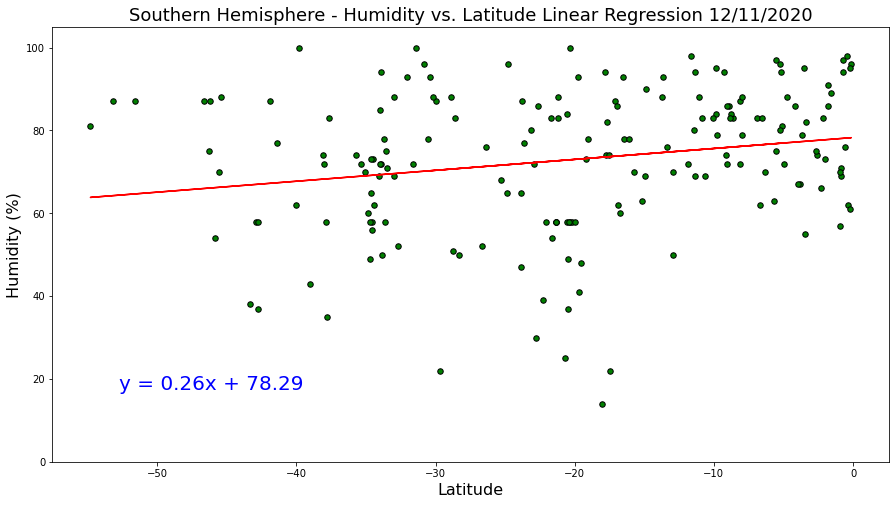

In [214]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Humidity vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Humidity'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Humidity (%)',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(0, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(-30, 50), xycoords='data',xytext=(0.3, 0.2), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/SouthernHem_Humidity_vs_Lat_Linear_Regression.png")

plt.show()

In [ ]:
# Northern/Southern Hemisphere Regression Observation(s) - Both plot depicted a small rising in humidity  as 
#they moved northward. Correlation was relatively low in either case. Both depicted the majority of their humidity readings
#at above 60%

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [215]:
#Narrow Latitude to Northern Hemisphere
NH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] >=0)]

In [216]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Cloudiness'])[0],5)
Correlation_Coef

0.19121

In [217]:
#Calulate linear formula
x_values = NH_clean_weather_data_df['Lat']
y_values = NH_clean_weather_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"NH Cloudiness vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,NH Cloudiness vs Lat,{0.39607090793256133},{36.85486339432492},{0.19121480617879041},{0.19121},{0.10361740200902164}


In [218]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.4x + 36.85'

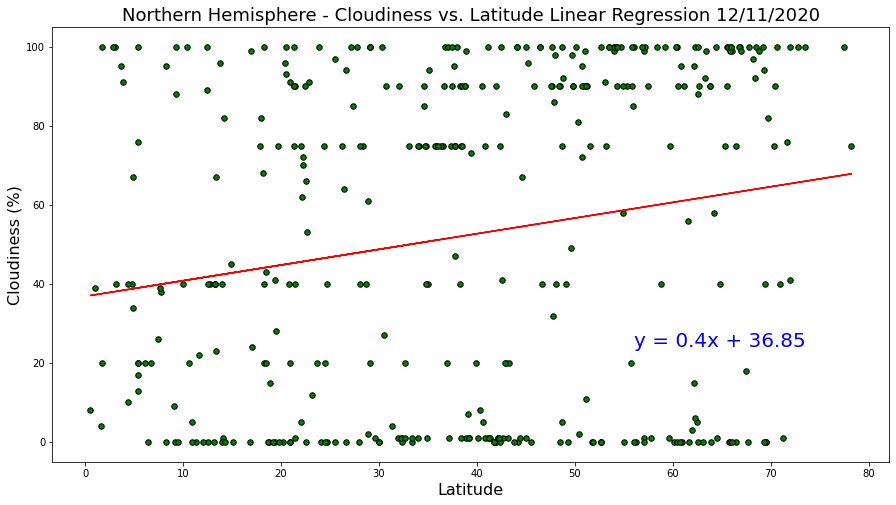

In [219]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Humidity vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Cloudiness'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Cloudiness (%)',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(-5, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(30, 50), xycoords='data',xytext=(0.9, 0.3), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/NorthernHem_Cloudiness_vs_Lat_Linear_Regression.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [220]:
#Narrow Latitude to Southern Hemisphere
SH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] <=0)]

In [221]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Cloudiness'])[0],5)
Correlation_Coef

0.24513

In [222]:
#Calulate linear formula
x_values = SH_clean_weather_data_df['Lat']
y_values = SH_clean_weather_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"SH Cloudiness vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,SH Cloudiness vs Lat,{0.7188257777084808},{71.70866898872801},{0.24513319094678926},{0.24513},{0.21073122922608717}


In [223]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.72x + 71.71'

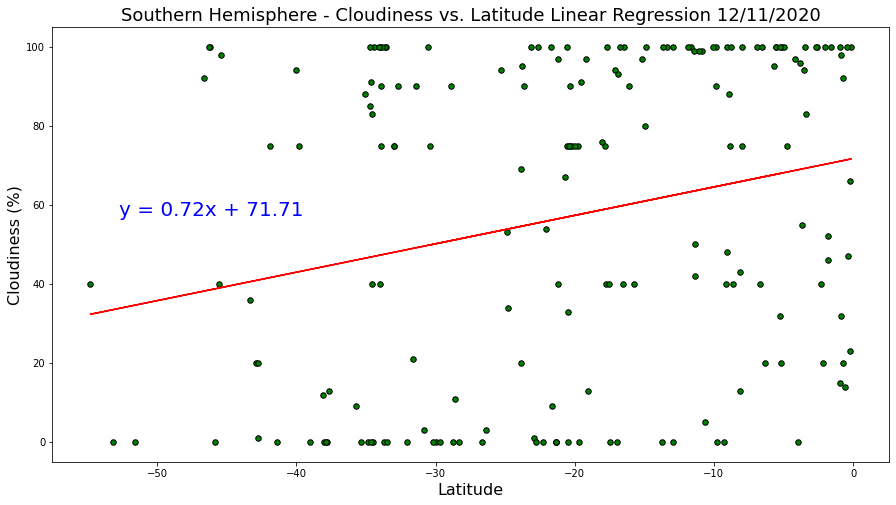

In [224]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Humidity vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Cloudiness'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Cloudiness (%)',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(-5, 105)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(-30, 50), xycoords='data',xytext=(0.3, 0.6), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/SouthernHem_Cloudiness_vs_Lat_Linear_Regression.png")

plt.show()

In [ ]:
# Northern/Southern Hemisphere Regression Observation(s) - Both plot depicted a small rising in cloudiness  as 
#they moved northward. Correlation was relatively low in either case. Both depicted a moderate number of completly 
# clear (0%) or totally cloudy (100%).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [247]:
#Narrow Latitude to Northern Hemisphere
NH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] >=0)]

In [248]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Wind Speed'])[0],5)
Correlation_Coef

0.10511

In [249]:
#Calulate linear formula
x_values = NH_clean_weather_data_df['Lat']
y_values = NH_clean_weather_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"NH Wind Speed vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,NH Wind Speed vs Lat,{0.01240826807095221},{2.846652890533825},{0.10511256906501085},{0.10511},{0.005982925778984792}


In [250]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.01x + 2.85'

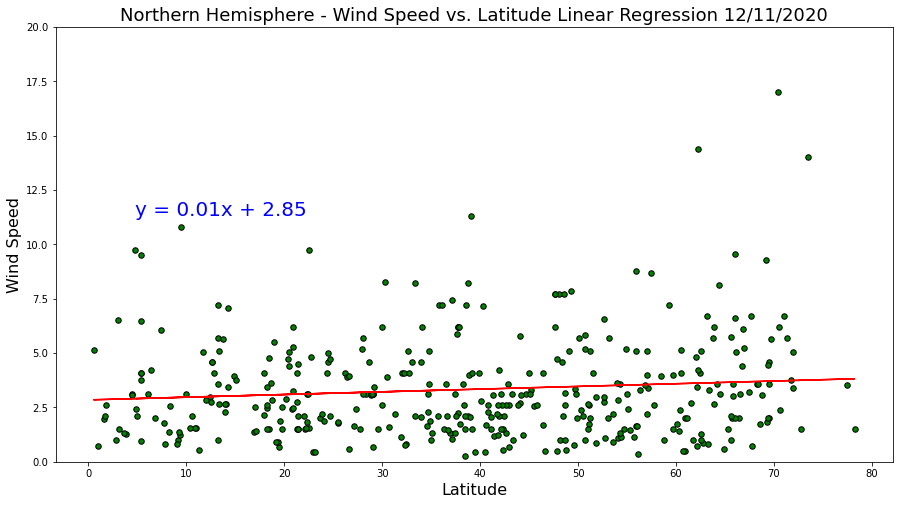

In [251]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Wind Speed vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(NH_clean_weather_data_df['Lat'],NH_clean_weather_data_df['Wind Speed'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Wind Speed',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(0, 20)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(10, 10), xycoords='data',xytext=(0.3, 0.6), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/NorthernHem_Wind_Speed_vs_Lat_Linear_Regression.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [237]:
#Narrow Latitude to Southern Hemisphere
SH_clean_weather_data_df = clean_weather_data_df[(clean_weather_data_df['Lat'] <=0)]

In [238]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Wind Speed'])[0],5)
Correlation_Coef

-0.26817

In [239]:
#Calulate linear formula
x_values = SH_clean_weather_data_df['Lat']
y_values = SH_clean_weather_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"SH Wind Speed vs Lat",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,SH Wind Speed vs Lat,{-0.053688967529618346},{2.514452276094395},{-0.2681723156808761},{-0.26817},{0.01429647494453765}


In [240]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -0.05x + 2.51'

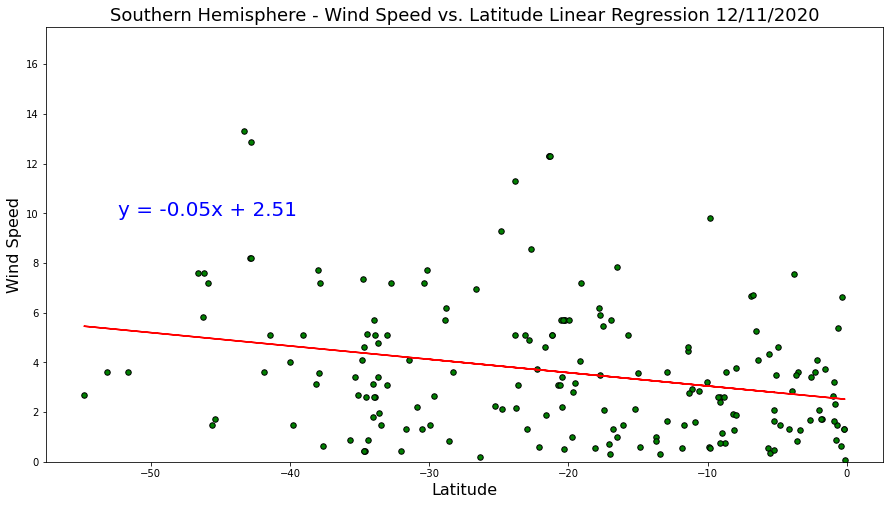

In [241]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Wind Speed vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(SH_clean_weather_data_df['Lat'],SH_clean_weather_data_df['Wind Speed'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression '+date,fontsize =18)
plt.xlabel('Latitude',fontsize =16)
plt.ylabel('Wind Speed',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(0, 17.5)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(-40, 10), xycoords='data',xytext=(0.3, 0.6), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("../output_data/SouthernHem_Wind_Speed_vs_Lat_Linear_Regression.png")

plt.show()

In [ ]:
# Northern/Southern Hemisphere Regression Observation(s) - Both plot depicted a small decline in wind speed as 
#they approached the equator. Correlation was relatively low in either case. Both depicted the majority of their 
#wind speeds at under 5.
